<div style="text-align: justify">
<font size=6><br>
<h4 align="center">Álgebra Lineal II</h4></font> 
<font size=5><h4 align="center">Taller Lights Out - Tema B</h4></font>  

<font size=4><br>
        
2170688 - Brayan Rodolfo Barajas Ochoa<br><br>

<font size=1>



Primeramente, se construye el grafo para visualizarlo y tener una mejor comprensión.

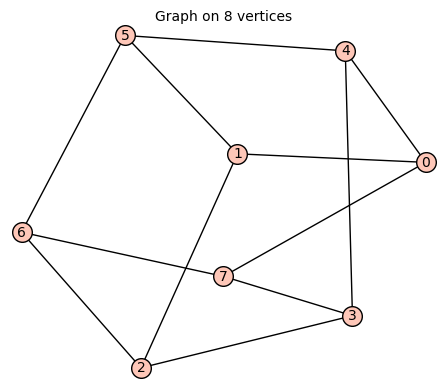

In [101]:
gr=Graph()
gr.add_vertices(range(8))
gr.add_edges([(0,1),(0,4),(0,7),(1,5),(1,2),(2,3),(2,6),(3,4),(3,7),(4,5),(5,6),(6,7)])
gr

Para modelar el grafo por medio de los conocimientos de álgebra lineal, se construyen los vectores de vecinos de cada nodo, para posteriormente crear la matriz que servirá como la Transformación Lineal para dar solución a los problemas planteados. También, se guarda en una variable el Span del conjunto de vectores de vecinos, el cual será de utilidad más adelante

In [105]:
SP=span([u0,u1,u2,u3,u4,u5,u6,u7]) #Span para verificar si existe solución
#Se sacan los vectores correspondientes a los vecinos de cada nodo
u0=vector(GF(2),[1,1,0,0,1,0,0,1])
u1=vector(GF(2),[1,1,1,0,0,1,0,0])
u2=vector(GF(2),[0,1,1,1,0,0,1,0])
u3=vector(GF(2),[0,0,1,1,1,0,0,1])
u4=vector(GF(2),[1,0,0,1,1,1,0,0])
u5=vector(GF(2),[0,1,0,0,1,1,1,0])
u6=vector(GF(2),[0,0,1,0,0,1,1,1])
u7=vector(GF(2),[1,0,0,1,0,0,1,1])
A=matrix(GF(2),[u0,u1,u2,u3,u4,u5,u6,u7])
print("Es simétrica: ",A==A.transpose()) #Se comprueba que sea simétrica
print(A)
print("Determinante: ",AA.determinant())

Es simétrica:  True
[1 1 0 0 1 0 0 1]
[1 1 1 0 0 1 0 0]
[0 1 1 1 0 0 1 0]
[0 0 1 1 1 0 0 1]
[1 0 0 1 1 1 0 0]
[0 1 0 0 1 1 1 0]
[0 0 1 0 0 1 1 1]
[1 0 0 1 0 0 1 1]
Determinante:  0


Ya se ha comprobado que sea simétrica, es decir, que esté correctamente construida la matriz

<b>1. Muestre una secuencia que al estar todas las luces prendidas las apague todas.</b>

Para realizar esto, se construye un vector de 8 elementos compuesto completamente de 1s, que simboliza el hecho de estar todos los nodos encendidos. Posteriormente se utiliza el comando backslash de sagemath para resolver la transformación lineal (o sistema de ecuaciones) planteada de la forma $Ax=p1$; pero como se está trabajando en $Z_{2}$, entonces $p1=-p1$, y por tanto $Ax+p1=0$, con lo cual se obtiene que los nodos a "oprimir" son los correspondientes a los del vector p1

In [121]:
p1=vector(GF(2),[1,1,1,1,1,1,1,1]) #vector para apagar todas las luces
print(A\p1)

(1, 1, 0, 0, 1, 1, 0, 0)


<b>2. Muestre una secuencia (si existe) que dada la configuración inicial que tiene encendidas
las luces 0,1,2 y 3 deje como estado final encendida únicamente la luz 7.</b>

Para pasar de tener encendidas las luces 0,1,2,3 a tener únicamente encendida la luz 7, se parte de la ecuación $Ax+estini=estfin$. Como ya se mencionó en el punto anterior, se está trabajando en $Z_{2}$, con lo cual se tiene que $Ax=estfin+estini$.<br>
Pero antes de intentar hallar una solución, es bueno revisar si existe alguna, para esto se verifica que este vector esté en el <i>span</i> del conjunto de vectores <i>SP</i>

In [110]:
estini=vector(GF(2),[1,1,1,1,0,0,0,0]) #vector inicial nodos 0,1,2,3
estfin=vector(GF(2),[0,0,0,0,0,0,0,1]) #vector final nodo 7
print(estini+estfin in SP)
if (estini+estfin) in SP:
    rtap2=(A\estini+estfin)
else:
    print("No existe solución")

False
No existe solución


Otra forma de verificarlo es comprobando si $estini$ y $estfin$ se encuentran en el span por separado. Para que tenga solución, es necesario que ambos vectores se encuentren en el span.

In [115]:
print("estini se encuentra en el span: ",estini in SP)
print("estfin se encuentra en el span: ",estfin in SP)

estini se encuentra en el span:  True
estfin se encuentra en el span:  False


<b>3. ¿Para qué luces tiene solución el problema anterior? Es decir, si las luces 0,1,2,3 están prendidas ¿qué luces pueden aparecer prendidas ellas solas en el estado final?</b>

Ya se tiene el estado inicial almacenado en el vector de la variable estini, con lo cual hace falta ir generando los estados finales para comprobar si alguno tiene solución. Esto se hace a continuación y se comprueba igualmente con el span.

In [123]:
soluciones=matrix(GF(2),8, 8)
for i in range(8):
    estf=zero_vector(GF(2), 8)
    estf[i]=1
    print("Nodo ",i, "encendido como estado final: ")
    print("Tiene solución: ",(estini+estf) in SP) 
    if estini in SP and estf in SP:
        soluciones[i]=(A\(p2a+p2b))

Nodo  0 encendido como estado final: 
Tiene solución:  False
Nodo  1 encendido como estado final: 
Tiene solución:  False
Nodo  2 encendido como estado final: 
Tiene solución:  False
Nodo  3 encendido como estado final: 
Tiene solución:  False
Nodo  4 encendido como estado final: 
Tiene solución:  False
Nodo  5 encendido como estado final: 
Tiene solución:  False
Nodo  6 encendido como estado final: 
Tiene solución:  False
Nodo  7 encendido como estado final: 
Tiene solución:  False


<b>4. Para las respuestas encontradas anterioremente determine cúantas soluciones hay</b>

Teniendo en cuenta la propiedad en la cual, si $v_{0} \in V y w_{0} \in W$ son tales que $T(v_{0})=w_{0}$ entonces: $\{v \in V|(T(v)=w_{0})\}=Nu(T)+v_{0}$.
Considerando esto, la cantidad de posibles soluciones está determinada por la combinación lineal entre la solución particular y el kernel o núcleo de la transformación lineal.

In [125]:
K=A.kernel()
print(K)
v1,v2=K.basis()

Vector space of degree 8 and dimension 2 over Finite Field of size 2
Basis matrix:
[1 0 1 0 1 0 1 0]
[0 1 0 1 0 1 0 1]


Al hallar el kernel, se observa que contiene 2 vectores, con lo cual, la cantidad de posibles soluciones sería de 4